# Implementing perceptron

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons


In [180]:
# Generating data

X, y = make_blobs(n_samples=500, centers=2, n_features=2, random_state = 10)
print(X.shape, y.shape)
# non-linear data
# X, y = make_moons(n_samples=1000, noise = 0.1,random_state = 1)
# print(X.shape, y.shape)

(500, 2) (500,)


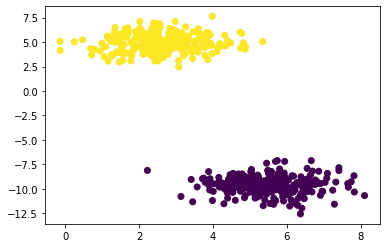

In [181]:
plt.scatter(X[:,0], X[:,1], c=y)


In [182]:
# Model and helper function

def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [183]:
z = np.array([1,2,4,5,6])
print(sigmoid(z))

[0.73105858 0.88079708 0.98201379 0.99330715 0.99752738]


# implement perceptron learning algorithm
 - Learn the weights
 - Reduce the loss
 - Make the predictions

In [184]:
def predict(X, weights):
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y, weights):
    """Binary cross entropy loss(negative of log loss value)"""
    Y_ = predict(X, weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """Perform weight update for 1 epoch"""
    Y_ = predict(X,weights)
    dw = np.dot(X.T, Y_-Y)
    
    m = X.shape[0]
    weights =weights - learning_rate*dw/(float(m))
    return weights
def train(X,Y,learning_rate = 0.5, maxEpochs=100):
    
    #Modify the input to handle the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    
    #Init weights 0
    weights = np.zeros(X.shape[1])
    
    # Iterate over all epochs and make updates
     
    for epoch in range(maxEpochs):
        weights = update(X,Y,weights, learning_rate)
        
        if epoch%100==0:
            l = loss(X,Y,weights)
            print("epoch %d loss %.5f"%(epoch,l))
            
    return weights

In [185]:
weights = train(X,y,maxEpochs=700)

epoch 0 loss 0.00057
epoch 100 loss 0.00035
epoch 200 loss 0.00026
epoch 300 loss 0.00020
epoch 400 loss 0.00017
epoch 500 loss 0.00014
epoch 600 loss 0.00013


In [186]:
def getPrediction(X_Test, weights,label=False):
    # Checking the bias term for W0
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
    probs = predict(X_Test,weights)
    
    if not label:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

In [187]:
x1 = np.linspace(-2,2,10)
x2 = -(weights[0]+weights[1]*x1)/weights[2]

# getPrediction(X,weights,True)

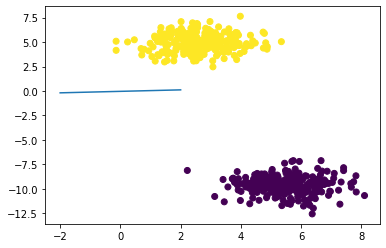

In [188]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.plot(x1,x2)
plt.show()

In [189]:
# Finding the accuracy of the problem
Y_ = getPrediction(X,weights, True)

In [178]:
Y_

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

In [179]:
accuracy = np.sum(Y_ == y)/y.shape[0]*100
print("Model Accuracy {}%".format(accuracy))

Model Accuracy 88.0%
